In [ ]:
# Colab에 Mecab 설치 출처 :https://wikidocs.net/94748
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-07-14 06:36:45--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c2:513, 2406:da00:ff00::22c3:9b0a, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuserupload

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt
import io
df1=pd.read_csv('/content/drive/My Drive/your data',  error_bad_lines=False)
df2=pd.read_csv('/content/drive/My Drive/your data',  error_bad_lines=False)
df3=pd.read_csv('/content/drive/My Drive/your data',  error_bad_lines=False)
df4=pd.read_csv('/content/drive/My Drive/your data',  error_bad_lines=False)

df1.head(10)

,Place,Date,Review,Score
0,전주 한옥마을,2021.06.07,#스타벅스,5.0
1,전주 한옥마을,2021.04.21,#스타벅스 #스타벅스디티,5.0
2,전주 한옥마을,2021.04.01,좋아요,5.0
3,전주 한옥마을,2021.03.04,굿,4.0
4,전주 한옥마을,2021.02.28,굿,5.0
5,전주 한옥마을,2021.02.28,감사합니다,5.0
6,전주 한옥마을,2021.02.27,늘 주문하는 곳,3.5
7,전주 한옥마을,2021.02.23,굿,5.0
8,전주 한옥마을,2021.02.19,조아요,5.0
9,전주 한옥마을,2021.02.19,친절해요.,5.0


In [ ]:
cdf1=df1[['Review', 'Score']]
pd.to_numeric(cdf1.Score)
cdf1.head()

,Review,Score
0,#스타벅스,5.0
1,#스타벅스 #스타벅스디티,5.0
2,좋아요,5.0
3,굿,4.0
4,굿,5.0


In [ ]:
cdf2=df2[['Review', 'Score']]
cdf2.Score=pd.to_numeric(cdf2.Score, errors='coerce')
cdf2=cdf2.dropna()
#cdf2.head()
cdf2[310:320]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Review,Score
310,"각 지역마다 세워진 조선이 교육기관입니다. 전주 향교는 앞에 대성전, 뒤에 명륜당이...",4.0
311,조선시대 양반 자제들이 공부하는 곳이 향교라고 하죠. 전주향교 역시 그런 곳입니다....,3.0
312,활기찬 현재의 한옥마을에서 잠시나마 조선시대의 여유를 즐길 수 있는 곳...향교는 ...,4.0
313,사람들이 많지 않아서 조용히 둘러보고 오기 좋았습니다. 봄이 시작되어 잔디와 나무에...,4.0
314,한옥마을 끝자라에 있고 맞은편에는 국립무형문화원이 있다. 작은 성균관이라 볼 수 있...,4.0
315,한옥 마을 안에 위치해요~ 조선시대 교육을 담당했던 곳이죠~ ~~가을에 가면 아름다...,4.0
316,한옥마을 안에 위치해 있어요여기서 드라마나 영화 촬영도 많이 한거 같아요깨끗하게 관...,4.0
317,향교는 노오란 옷을 입고 맞이해줍니다.오래된 나무로 인해 사극 드라마에도 많이 나와...,4.0
319,불과 몇년전 전주를 왔을때 들렸던 막걸리골목보다 조금은 활기차지긴 했지만 그때 느꼈...,3.0
320,막걸리를 한병 시키면 다양한 안주가 따라 나오던예전의 매력은 떨어지지만가족여행객들이...,4.0


In [ ]:
#cdf3=df3[['Review', 'Score']]
#cdf3.head()

In [ ]:
cdf4=df4[['Review', 'Score']]
cdf4.head()
pd.to_numeric(cdf4.Score)
print(type(cdf4.Score[10]))

<class 'numpy.int64'>


In [ ]:
total_data = pd.concat([cdf1,cdf2,cdf4])
#total_data[5100:]
print(len(total_data))

5444


In [ ]:
pd.to_numeric(total_data.Score)
#print(type(total_data.Score))
#df_negative = total_data[(total_data.Score == '1.0') | (total_data.Score == '2.0') | (total_data.Score == '0.5') |(total_data.Score == '1.5')].copy()
#df_negative = total_data[(total_data.Score == 1.0) | (total_data.Score == 2.0) | (total_data.Score == 0.5) |(total_data.Score == 1.5)].copy()
df_negative = total_data[total_data.Score < 4].copy()
df_negative['label'] = 0
df_negative.head()
print(len(df_negative))

1083


In [ ]:
'''df_neutral = total_data[(total_data.Score == 3.0)| (total_data.Score == 2.5)].copy()
df_neutral['label'] = 1
df_neutral.head()
print(len(df_neutral))'''

"df_neutral = total_data[(total_data.Score == 3.0)| (total_data.Score == 2.5)].copy()\ndf_neutral['label'] = 1\ndf_neutral.head()\nprint(len(df_neutral))"

In [ ]:
#df_positive = total_data[(total_data.Score == 4.0) | (total_data.Score == 5.0)| (total_data.Score == 3.5)| (total_data.Score == 4.5)].copy()
df_positive = total_data[total_data.Score >= 4].copy()
df_positive['label'] = 1
df_positive.head()
print(len(df_positive))

4361


In [ ]:
tdf = pd.concat([df_positive,df_negative])
print(tdf)

                                                Review  Score  label
0                                                #스타벅스    5.0      1
1                                        #스타벅스 #스타벅스디티    5.0      1
2                                                  좋아요    5.0      1
3                                                    굿    4.0      1
4                                                    굿    5.0      1
..                                                 ...    ...    ...
265  신규오픈이라 깔끔은 했으나, 라마다 브랜드가 아까울정도로 워스트임! 재방문의사 절대...    1.0      0
268  군산지역을 방문시 각종 매체에서 추천하는 호텔로 가격도 적당하고 주위 유흥가 및 음...    3.0      0
295  다양한 편의시설이 있으며,  편안한 휴식을 취할수 있는곳 임.  편의시설로는 골프연...    3.0      0
299  검색을 통해서 갔고 번잡한 시내를 벗어나서 숙소를 잡았습니다.사진으로 보나 실제 건...    3.0      0
311  전 하룻 동안 이 호텔에서 머물렀었습니다. 밤 늦게 도착을 했는데, 주인이 카운터에...    3.0      0

[5444 rows x 3 columns]


In [ ]:
print(tdf.isnull().values.any())

False


In [ ]:
train_data, test_data = train_test_split(tdf, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 4083
테스트용 리뷰의 개수 : 1361


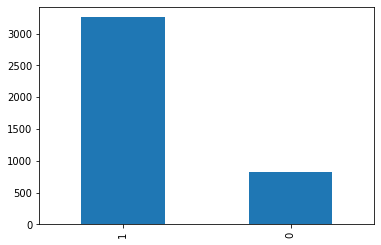

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar')

In [ ]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0    827
1      1   3256


In [ ]:
train_data['Review'] = train_data['Review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['Review'].replace('', np.nan, inplace=True)

train_data=train_data.dropna()
print(train_data.isnull().sum())

Review    0
Score     0
label     0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
#test_data.drop_duplicates(subset = ['Review'], inplace=True) # 중복 제거
test_data['Review'] = test_data['Review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['Review'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 1341


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만', '게임', '겜', '되', '음', '면']

In [ ]:
mecab = Mecab() 

train_data['tokenized'] = train_data['Review'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data['tokenized'] = test_data['Review'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
train_data.head()

,Review,Score,label,tokenized
504,전주에 왔다면 꼭 한 번 둘러봐도 괜찮을 곳입니다천주교 성지이기도 하고 역사도 배울...,5.0,1,"[전주, 왔, 다면, 꼭, 번, 둘러봐도, 괜찮, 곳, 입니다, 천주교, 성지, 기..."
2847,귀여운 아이템 득템,4.0,1,"[귀여운, 아이템, 득템]"
1459,만두 다 맛있어요,5.0,1,"[만두, 맛있, 어요]"
4014,깜짝 놀랄만한 화장실 일본화장실온줄 적어도 바로 앉아서 똥은 싸게 해 줘야죠 너무 ...,1.0,0,"[깜짝, 놀, 랄, 만한, 화장실, 일본, 화장실, 온, 줄, 적어도, 바로, 앉,..."
1127,만족했습니다,5.0,1,"[만족, 했, 습니다]"


In [ ]:
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [ ]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('있', 363), ('좋', 221), ('습니다', 210), ('는데', 191), ('어요', 190), ('었', 159), ('없', 158), ('안', 146), ('네요', 144), ('했', 142), ('것', 136), ('어', 134), ('아요', 133), ('에서', 128), ('않', 128), ('너무', 123), ('곳', 122), ('지만', 121), ('전주', 119), ('같', 116)]


In [ ]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('좋', 1517), ('있', 1277), ('어요', 1262), ('습니다', 919), ('었', 677), ('았', 614), ('맛있', 603), ('아요', 583), ('많', 457), ('너무', 452), ('는데', 433), ('기', 419), ('것', 417), ('곳', 416), ('했', 408), ('수', 405), ('에서', 382), ('어', 382), ('전주', 343), ('잘', 333)]


긍정 리뷰의 평균 길이 : 16.940130963517305
부정 리뷰의 평균 길이 : 21.600246002460025


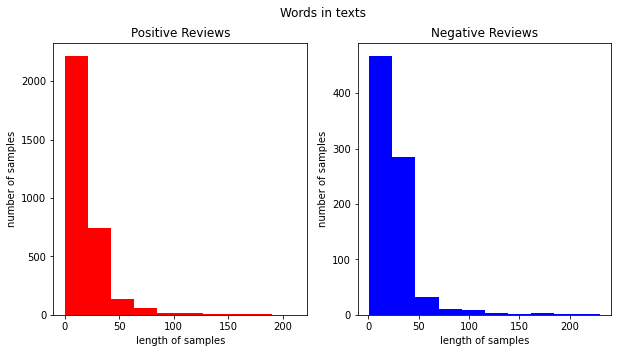

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 6594
등장 빈도가 1번 이하인 희귀 단어의 수: 3025
단어 집합에서 희귀 단어의 비율: 45.875037913254474
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.2079345648787


In [ ]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)
vocab_size = total_cnt
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 3571
단어 집합의 크기 : 6594


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[21, 87, 262, 99, 70, 3571, 120, 15, 35, 894, 1312, 16, 238, 3572, 19, 3, 4, 456, 108, 2030, 3, 3573, 108, 604, 263, 19, 3, 27, 3574, 220, 390, 3, 15, 35, 2565, 227, 18, 390, 3, 65, 2031, 19, 3, 332, 984, 3575, 228, 19, 3, 4, 116, 2032, 3576, 1468, 3577, 46, 19, 3, 283, 95, 221, 18, 21, 457, 46, 19, 3, 4, 221, 3578, 538, 3579, 488, 46, 19, 3, 1710, 787, 2566, 25, 3580, 15, 221, 3, 4, 40, 349, 96, 13, 34, 2565, 227, 3581, 488, 539, 287, 1710, 787, 2566, 126, 2033, 895, 985, 62, 3582, 21, 3583, 228, 13, 35], [896, 1711, 1469], [350, 9, 4]]


리뷰의 최대 길이 : 230
리뷰의 평균 길이 : 17.882587064676617


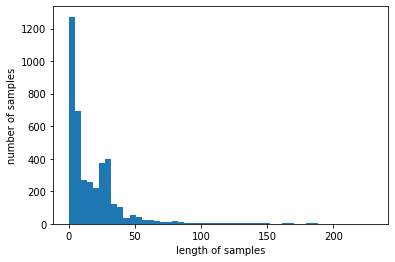

In [ ]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 130
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 130 이하인 샘플의 비율: 99.25373134328358


In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=1000, callbacks=[es, mc], batch_size=256, validation_split=0.2)

Epoch 1/1000
13/13 [==============================] - 47s 2s/step - loss: 0.5497 - acc: 0.7938 - val_loss: 0.4786 - val_acc: 0.7948

Epoch 00001: val_acc improved from -inf to 0.79478, saving model to best_model.h5
Epoch 2/1000
13/13 [==============================] - 18s 1s/step - loss: 0.4526 - acc: 0.7985 - val_loss: 0.4411 - val_acc: 0.7948

Epoch 00002: val_acc did not improve from 0.79478
Epoch 3/1000
13/13 [==============================] - 17s 1s/step - loss: 0.3907 - acc: 0.8256 - val_loss: 0.4172 - val_acc: 0.8433

Epoch 00003: val_acc improved from 0.79478 to 0.84328, saving model to best_model.h5
Epoch 4/1000
13/13 [==============================] - 17s 1s/step - loss: 0.3174 - acc: 0.8890 - val_loss: 0.3867 - val_acc: 0.8458

Epoch 00004: val_acc improved from 0.84328 to 0.84577, saving model to best_model.h5
Epoch 5/1000
13/13 [==============================] - 17s 1s/step - loss: 0.2643 - acc: 0.9055 - val_loss: 0.3996 - val_acc: 0.8570

Epoch 00005: val_acc improved fro

In [ ]:
loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

42/42 [==============================] - 3s 54ms/step - loss: 0.3529 - acc: 0.8717
테스트 정확도: 0.8717


In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))
sentiment_predict('노잼 ..완전 재미 없음 ㅉㅉ')

85.15% 확률로 긍정 리뷰입니다.


In [ ]:
sentiment_predict('진짜 별로')

53.09% 확률로 부정 리뷰입니다.


In [ ]:
sentiment_predict('최악 극혐') # 순위권에 없는 부정어로 말을 만들자 제대로 인식하지 못함

54.60% 확률로 긍정 리뷰입니다.


In [ ]:
sentiment_predict('조금 어렵지만 재밌음ㅋㅋ') 

81.33% 확률로 긍정 리뷰입니다.


In [ ]:
sentiment_predict('케릭터가 예뻐서 좋아요') # 긍정어는 전반적으로 잘 인식 - 당연함 왜냐면 긍정어 데이터가 훨씬 많기 때문에

87.76% 확률로 긍정 리뷰입니다.


In [ ]:
sentiment_predict('필요한게 없다')

51.79% 확률로 부정 리뷰입니다.


In [ ]:
sentiment_predict('안 했네요') # 부정어에서 순위권에 있는 단어로만 조합하면 부정어로 인식 다만 해당 단어들은 긍정어에서도 순위가 높아서 확률이 높지 않음

59.54% 확률로 부정 리뷰입니다.


In [ ]:
sentiment_predict('안좋다') # 긍정어(재미, 잘)를 훨씬 높게 취급하는 문제 - 부정어 데이터 부족 + mecab의 부정어 추출 성능 부족

63.12% 확률로 긍정 리뷰입니다.
